Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading dataset into pandas dataframe

df = pd.read_csv(filepath_or_buffer='data/train.csv.zip')
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [3]:
## columns
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

In [4]:
# size of the dataframe
print("Shape of the dataframe: \n", df.shape)

# null values
print("Count of null values: \n", df.isna().sum())

# no of unique values per column 
print("Unique values per column: \n", df.nunique())

Shape of the dataframe: 
 (14993, 24)
Count of null values: 
 Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64
Unique values per column: 
 Type                 2
Name              9060
Age                106
Breed1             176
Breed2             135
Gender               3
Color1               7
Color2               7
Color3               6
MaturitySize         4
FurLength            3
Vaccinated           3
Dewormed             3
Sterilized           3
Health               3
Quantity            19
F

Over a thousand missing values on Name field and 12 on descrition field.

In [5]:
# looking at some general statistics
# odd things - max age is 255
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,14993.0,1.457614,0.498217,1.0,1.0,1.0,2.0,2.0
Age,14993.0,10.452078,18.155790,0.0,2.0,3.0,12.0,255.0
Breed1,14993.0,265.272594,60.056818,0.0,265.0,266.0,307.0,307.0
Breed2,14993.0,74.009738,123.011575,0.0,0.0,0.0,179.0,307.0
Gender,14993.0,1.776162,0.681592,1.0,1.0,2.0,2.0,3.0
Color1,14993.0,2.234176,1.745225,1.0,1.0,2.0,3.0,7.0
Color2,14993.0,3.222837,2.742562,0.0,0.0,2.0,6.0,7.0
Color3,14993.0,1.882012,2.984086,0.0,0.0,0.0,5.0,7.0
MaturitySize,14993.0,1.862002,0.547959,1.0,2.0,2.0,2.0,4.0
FurLength,14993.0,1.467485,0.599070,1.0,1.0,1.0,2.0,3.0


In [6]:
# let's look at the age column (1 = dog, 2 = cat)
# there seems to be age of pet's that are beyond what we would consider acceptable 
# Most likely wrong values

pets_by_age_df = df.groupby(by=['Type','Age']).count()['PetID'].reset_index()
pets_by_age_df.head()

,Type,Age,PetID
0,1,0,85
1,1,1,1288
2,1,2,1984
3,1,3,939
4,1,4,475


In [7]:
# looking at the dogs (found an article that said dogs max age is around 20)
# that is quite a large number for miss labeled age

pets_by_age_df[pets_by_age_df['Type'] == 1][pets_by_age_df['Age'] > 20]['PetID'].sum()

<ipython-input-7-ac494ecdfba6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pets_by_age_df[pets_by_age_df['Type'] == 1][pets_by_age_df['Age'] > 20]['PetID'].sum()


1647

In [8]:
# looking at the cats (found article that says cats max age is around 30)

pets_by_age_df[pets_by_age_df['Type'] == 2][pets_by_age_df['Age'] > 30]['PetID'].sum()

<ipython-input-8-1ff6410a9a11>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pets_by_age_df[pets_by_age_df['Type'] == 2][pets_by_age_df['Age'] > 30]['PetID'].sum()


300

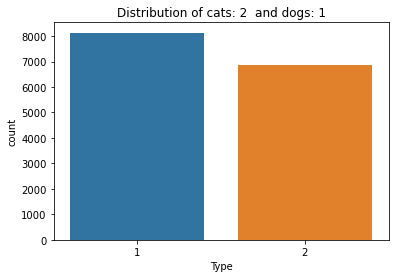

In [9]:
# type refers to the type of animal (1 = dog and 2 = cat)
# Over 1000 more dogs than cats

sns.countplot(x='Type', data=df)
plt.title('Distribution of cats: 2  and dogs: 1')
plt.show()

In [10]:
# 10 most common names for pets in the dataset
[(x, y) for x, y in zip(df['Name'].value_counts()[:10], df['Name'].value_counts()[:10].index)]

[(66, 'Baby'),
 (64, 'Lucky'),
 (54, 'Brownie'),
 (54, 'No Name'),
 (52, 'Mimi'),
 (49, 'Blackie'),
 (45, 'Puppy'),
 (39, 'Max'),
 (39, 'Kittens'),
 (39, 'Kitty')]

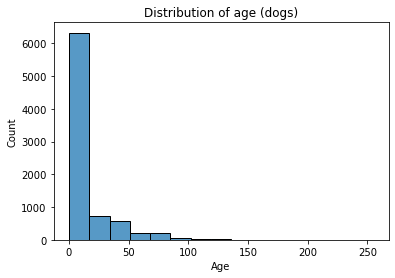

In [11]:
# age of the dogs
sns.histplot(data=df[df['Type']==1], x='Age', bins=15,)
plt.title('Distribution of age (dogs)')
plt.show()

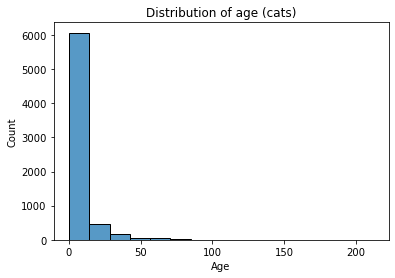

In [12]:
# age distribution of cats
sns.histplot(data=df[df['Type']==2], x='Age', bins=15,)
plt.title('Distribution of age (cats)')
plt.show()

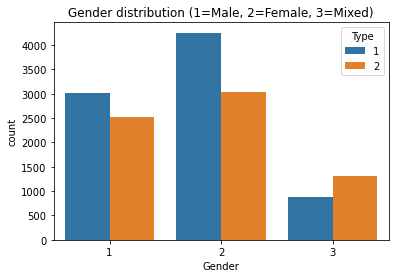

In [13]:
# distribution of gender 

sns.countplot(x='Gender', data=df, hue='Type')
plt.title('Gender distribution (1=Male, 2=Female, 3=Mixed)')
plt.show()

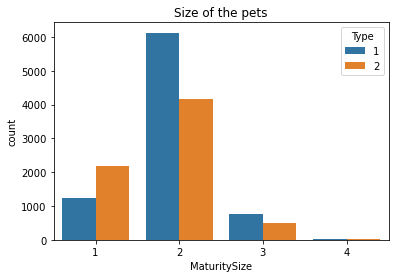

In [14]:
# maturity size
# 1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified

sns.countplot(x='MaturitySize', data=df, hue='Type')
plt.title('Size of the pets')
plt.show()

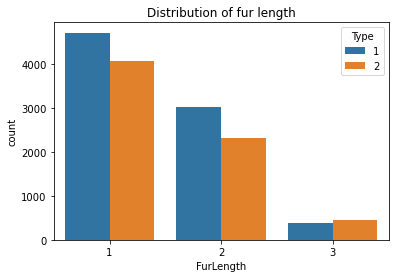

In [15]:
# distribution of fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)

sns.countplot(x='FurLength', data=df, hue='Type')
plt.title('Distribution of fur length')
plt.show()

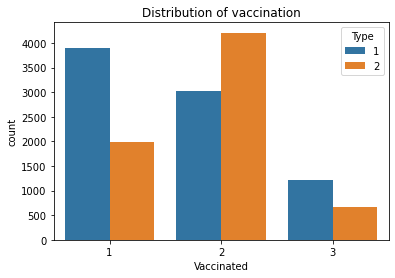

In [16]:
# Vaccinated  (1 = Yes, 2 = No, 3 = Not Sure)

sns.countplot(x='Vaccinated', data=df, hue='Type')
plt.title('Distribution of vaccination')
plt.show()

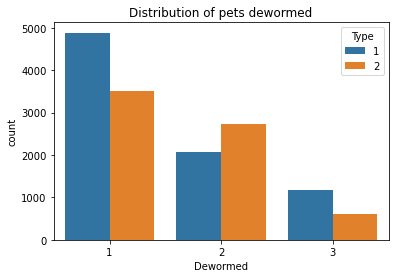

In [17]:
# Dewormed  (1 = Yes, 2 = No, 3 = Not Sure)

sns.countplot(x='Dewormed', data=df, hue='Type')
plt.title('Distribution of pets dewormed')
plt.show()

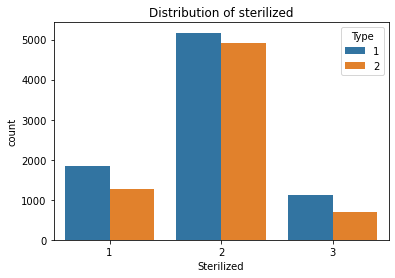

In [18]:
# Spayed or neutered  (1 = Yes, 2 = No, 3 = Not Sure)

sns.countplot(x='Sterilized', data=df, hue='Type')
plt.title('Distribution of sterilized')
plt.show()

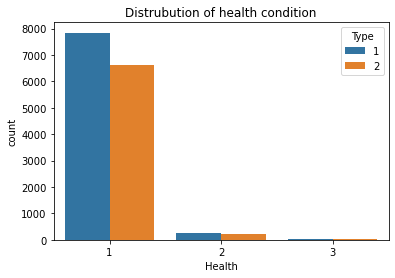

In [19]:
# Health condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

sns.countplot(x='Health', data=df, hue='Type')
plt.title('Distrubution of health condition')
plt.show()

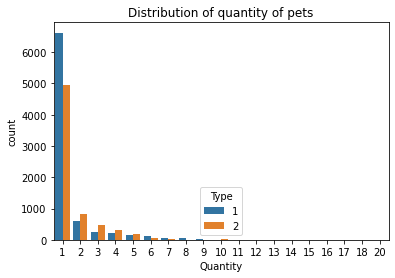

In [20]:
# no of pets present in the profile

sns.countplot(x='Quantity', data=df, hue='Type')
plt.title('Distribution of quantity of pets')
plt.show()

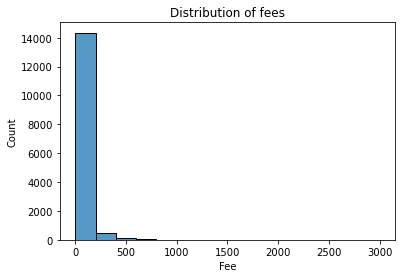

In [21]:
# Fee for the pet (0 = free)

sns.histplot(x='Fee', data=df)
plt.title('Distribution of fees')
plt.show()

In [22]:
### Let's look at the highly prices pets
# Not sure the currency is dollar or not
df['Fee'].value_counts().sort_index(ascending=False).head()

3000    1
2000    1
1000    4
800     2
750     7
Name: Fee, dtype: int64

In [23]:
## lot of the pets do not have any video

df['VideoAmt'].value_counts()

0    14419
1      417
2       92
3       36
4       15
5        7
6        4
8        2
7        1
Name: VideoAmt, dtype: int64

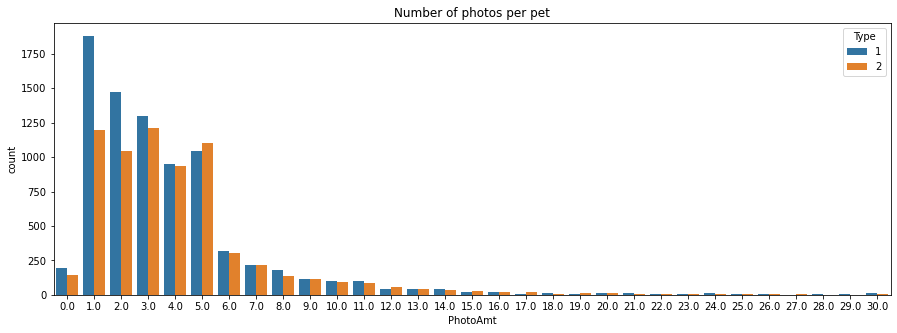

In [24]:
## number of photos uploaded per pet

plt.figure(figsize=[15,5])
sns.countplot(x='PhotoAmt', data=df, hue='Type')
plt.title('Number of photos per pet')
plt.show()

In [25]:
# description of the pet

df[['Description','AdoptionSpeed']]

,Description,AdoptionSpeed
0,Nibble is a 3+ month old ball of cuteness. He ...,2
1,I just found it alone yesterday near my apartm...,0
2,Their pregnant mother was dumped by her irresp...,3
3,"Good guard dog, very alert, active, obedience ...",2
4,This handsome yet cute boy is up for adoption....,2
...,...,...
14988,I have 4 kittens that need to be adopt urgentl...,2
14989,Serato(female cat- 3 color) is 4 years old and...,4
14990,"Mix breed, good temperament kittens. Love huma...",3
14991,she is very shy..adventures and independent..s...,4


In [92]:
## copying the dataframe

df_copy = df.copy()

In [93]:
# columns to be dropped: 'Name', 'Description', 'PetID', 'RescuerID', 
drop_cols = ['Name', 'Description', 'PetID', 'RescuerID', 'AdoptionSpeed',]

print(f"Shape of the dataframe before dropping columns: {df_copy.shape}")
X_train = df_copy.drop(labels=drop_cols, axis=1)
print(f"Shape of the dataframe after dropping columns: {X_train.shape}")

Shape of the dataframe before dropping columns: (14993, 24)
Shape of the dataframe after dropping columns: (14993, 19)


In [94]:
# training labels 
y_train = df_copy['AdoptionSpeed']
y_train.shape

(14993,)

In [95]:
# counting the no of unique values in each column after dropping a few columns 

# nan values
print("NAN values:",X_train.isna().sum())

# unique values 
print(X_train.nunique())

NAN values: Type            0
Age             0
Breed1          0
Breed2          0
Gender          0
Color1          0
Color2          0
Color3          0
MaturitySize    0
FurLength       0
Vaccinated      0
Dewormed        0
Sterilized      0
Health          0
Quantity        0
Fee             0
State           0
VideoAmt        0
PhotoAmt        0
dtype: int64
Type              2
Age             106
Breed1          176
Breed2          135
Gender            3
Color1            7
Color2            7
Color3            6
MaturitySize      4
FurLength         3
Vaccinated        3
Dewormed          3
Sterilized        3
Health            3
Quantity         19
Fee              74
State            14
VideoAmt          9
PhotoAmt         31
dtype: int64


In [96]:
## filtering out columns that have less than 15 values

discrete_columns = [columns for columns in X_train.columns if X_train[columns].nunique() < 15]
cont_columns = [columns for columns in X_train.columns if X_train[columns].nunique() > 15]

In [97]:
discrete_columns, cont_columns

(['Type',
  'Gender',
  'Color1',
  'Color2',
  'Color3',
  'MaturitySize',
  'FurLength',
  'Vaccinated',
  'Dewormed',
  'Sterilized',
  'Health',
  'State',
  'VideoAmt'],
 ['Age', 'Breed1', 'Breed2', 'Quantity', 'Fee', 'PhotoAmt'])

In [98]:
#  Splitting the dataset into train and valid set
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.1, stratify=y_train)

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(13493, 19) (13493,) (1500, 19) (1500,)


In [99]:
# # Using column transform to onehot encode multiple columns 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [100]:
# initializing the column transform object

# ct = ColumnTransformer(
#      [("cat", OneHotEncoder(), discrete_columns)], remainder='passthrough')

ct = ColumnTransformer(
        [('cat', OneHotEncoder(), discrete_columns),
         ('cont', StandardScaler(), cont_columns)])

In [101]:
# calling the transform 

X_train = ct.fit_transform(X_train)
X_valid = ct.transform(X_valid)

In [102]:
X_train, X_valid

(<13493x73 sparse matrix of type '<class 'numpy.float64'>'
 	with 256367 stored elements in Compressed Sparse Row format>,
 <1500x73 sparse matrix of type '<class 'numpy.float64'>'
 	with 28500 stored elements in Compressed Sparse Row format>)

In [103]:
X_train = X_train.todense()
X_valid = X_valid.todense()

In [104]:
X_train = pd.DataFrame(X_train)
X_valid = pd.DataFrame(X_valid)

In [105]:
X_train.shape, X_valid.shape

((13493, 73), (1500, 73))

Let's try a Bayesian Model

In [106]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [107]:
gaussian_model = GaussianNB()

gaussian_model.fit(X_train, y_train)

GaussianNB()

In [108]:
# Using gaussian model to predict the validation set

gaussian_predictions_valid = gaussian_model.predict(X_valid)
gaussian_predictions_train = gaussian_model.predict(X_train)

In [116]:
## evaluating the model with weighted kappa 
from sklearn.metrics import cohen_kappa_score

gaussian_kappa_valid = cohen_kappa_score(y_valid, gaussian_predictions_valid, weights='quadratic')
gaussian_kappa_train = cohen_kappa_score(y_train, gaussian_predictions_train, weights='quadratic')

print(f"For gaussian model cohen kappa: \nTrain: {gaussian_kappa_train} Valid: {gaussian_kappa_valid}")

For gaussian model cohen kappa: 
Train: 0.015189153968617974 Valid: 0.013920235083839438


In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [112]:
# predictions from the randomforest model

rf_predictions_valid = rf.predict(X_valid)
rf_predictions_train = rf.predict(X_train)

In [117]:
## Cohen Kappa score from rf. We can see that we have quite a high level of over fitting
## We know that the model is training

rf_kappa_valid = cohen_kappa_score(y_valid, rf_predictions_valid, weights='quadratic')
rf_kappa_train = cohen_kappa_score(y_train, rf_predictions_train, weights='quadratic')

print(f"For Random Forest model cohen kappa: \nTrain: {rf_kappa_train} Valid: {rf_kappa_valid}")

For Random Forest model cohen kappa: 
Train: 0.9852835572552524 Valid: 0.2667279217452819


In [114]:
## Let's try Gradient boosting classifier from sklearn learn
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [115]:
# evaluating gradient boosting model

gb_predictions_valid = gb_model.predict(X_valid)
cohen_kappa_gb = cohen_kappa_score(gb_predictions_valid, y_valid, weights='quadratic')

print(f"For Random Forest model cohen kappa: {cohen_kappa_gb}")

For Random Forest model cohen kappa: 0.3031254065305061


In [124]:
## Let's look at some predictions
print(f"True values:\n\t{y_valid[100:110].values}")
print(f"Predicted values:\n\t{gb_model.predict(X_valid[100:110])}")

True values:
	[4 2 2 4 4 3 1 4 2 4]
Predicted values:
	[4 3 3 4 4 4 2 3 2 4]
